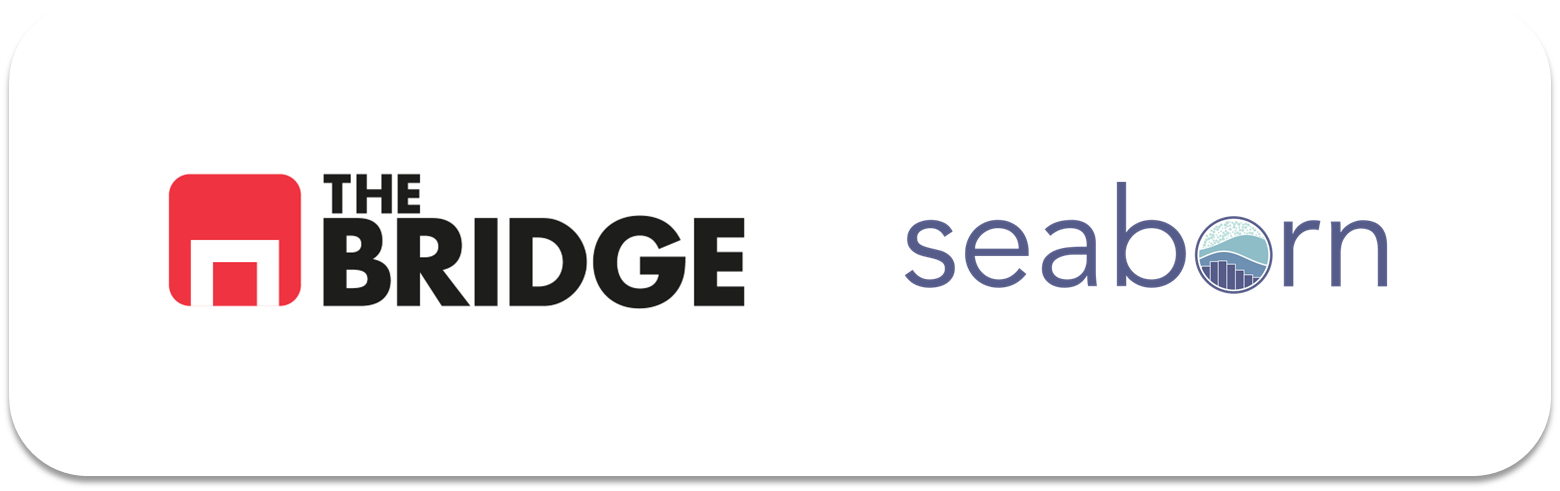

## PRACTICA OBLIGATORIA: VISUALIZACION Y PRESENTACION

* La práctica obligatoria de esta unidad se divide en dos partes, una dedicada a visualización y construcción de funciones, y la otra a hacer una presentación de resultados. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## #1 VISUALIZACION

### #1.1

Carga el dataset de las ciudades de California que está en la ruta "./data/california_cities.csv". Muestra su contenido, deshazte de las filas con nulos.

In [2]:
df= pd.read_csv("./data/california_cities.csv")
df

,Unnamed: 0,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
0,0,Adelanto,34.576111,-117.432778,875.0,2871.0,31765,56.027,56.009,0.018,145.107,145.062,0.046,0.03
1,1,AgouraHills,34.153333,-118.761667,281.0,922.0,20330,7.822,7.793,0.029,20.260,20.184,0.076,0.37
2,2,Alameda,37.756111,-122.274444,NaN,33.0,75467,22.960,10.611,12.349,59.465,27.482,31.983,53.79
3,3,Albany,37.886944,-122.297778,NaN,43.0,18969,5.465,1.788,3.677,14.155,4.632,9.524,67.28
4,4,Alhambra,34.081944,-118.135000,150.0,492.0,83089,7.632,7.631,0.001,19.766,19.763,0.003,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,477,Yountville,38.403056,-122.362222,30.0,98.0,2933,1.531,1.531,0.000,3.966,3.966,0.000,0.00
478,478,Yreka,41.726667,-122.637500,787.0,2582.0,7765,10.053,9.980,0.073,26.036,25.847,0.188,0.72
479,479,YubaCity,39.134722,-121.626111,18.0,59.0,64925,14.656,14.578,0.078,37.959,37.758,0.201,0.53
480,480,Yucaipa,34.030278,-117.048611,798.0,2618.0,51367,27.893,27.888,0.005,72.244,72.231,0.013,0.02


### #1.2

Crea una función similar a la que se pide en el ejercicio 6 de la segunda tanda de ejercicios del workout. Es decir, una función para pintar diagramas de dispersion que tenga seis argumentos, pero ojo al cambio en el quinto:
1. Un dataframe
2. Una columna numérica del dataframe
3. Una columna numérica del dataframe diferente a la anterior.
4. Un columna categórica (Opcional, valor por defecto None)
5. Un valor para el tamaño de los puntos o una cadena, pero que puede ser una cadena de caracteres, en cuyo caso se debe interpretar como una de las columnas del dataframe cuyos valores deben controlar el tamaño
6. Un sexto argumento "escala", que permita manipular la escala del tamaño en el caso de que el quinto argumento sea una cadena. Este argumento multiplicará a los valores de la columna indicada en el parámetro anterior (así si quiero dividir por 10000, este sexto argumento tendrá que valer 1/10000)

La función debe pintar el diagrama de dispersión de la columna numérica 1, en el eje X, frente a la columna numérica 2, en el eje Y, usando un código de colores en función de la columna categórica y con el tamaño de los puntos según el argumento correspondiente. 

Si no se diera una columna categórica como argumento, el color no debe pasarse como parámetro a la función de Seaborn o Matplotlib que uses.

EXTRA: Añade un argumento que controle si la función pinta una leyenda para colores y tamaños o un colorbar y una leyenda para los tamaños. NO TE PREOCUPES POR EL FORMATO DE LA LEYENDA (lo veremos en la sesión en vivo)

In [3]:
def crear_scatter_avanzado(df, col_num1, col_num2, col_cat=None, tamano='default', escala=1):
    
    #Función para crear un diagrama de dispersión entre dos variables numéricas, con opciones avanzadas para el tamaño de los puntos y codificación por colores.

    # Configurar el estilo de seaborn
    sns.set_style("whitegrid")
    
    # Crear una figura con un tamaño adecuado
    plt.figure(figsize=(12, 8))
    
    # Determinar los tamaños de los puntos
    if isinstance(tamano, str) and tamano != 'default':
        # Verificar que la columna existe en el DataFrame
        if tamano not in df.columns:
            raise ValueError(f"La columna '{tamano}' no existe en el DataFrame")
        
        # Calcular tamaños usando la columna especificada y el factor de escala
        sizes = df[tamano] * escala
        
        # Añadir una nota sobre qué columna controla el tamaño
        size_label = f"Tamaño: {tamano}"
    else:
        # Usar un tamaño fijo
        sizes = 100 if tamano == 'default' else tamano
        size_label = f"Tamaño fijo: {sizes}"
    
    # Crear el diagrama de dispersión
    if col_cat is None:
        # Scatter plot sin variable categórica
        scatter = sns.scatterplot(
            data=df,
            x=col_num1,
            y=col_num2,
            s=sizes
        )
    else:
        # Scatter plot con variable categórica para colores
        scatter = sns.scatterplot(
            data=df,
            x=col_num1,
            y=col_num2,
            hue=col_cat,
            s=sizes
        )
        # Ajustar la leyenda
        plt.legend(title=col_cat, bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Configurar títulos y etiquetas
    plt.title(f'Diagrama de dispersión: {col_num2} vs {col_num1}\n{size_label}')
    plt.xlabel(col_num1)
    plt.ylabel(col_num2)
    
    # Si estamos usando tamaños variables, añadir una nota con el rango
    if isinstance(tamano, str) and tamano != 'default':
        min_size = sizes.min()
        max_size = sizes.max()
        plt.figtext(0.02, -0.05, 
                   f'Rango de tamaños: {min_size:.2f} - {max_size:.2f}',
                   ha='left')
    
    # Ajustar el diseño
    plt.tight_layout()
    
    # Mostrar el gráfico
    plt.show()
    
    return scatter



### #1.3

Pinta el diagrama de dispersión de longitud y latitud (longitud en las x, latitud en las y) de las ciudades, usando el tamaño de las ciudades para el tamaño de los puntos y los colores para mostrar la población. Previamente crea una columna nueva "log_poblacion" y asignale el log decimal de la poblacion (np.log10() y como argumento los valores de la columna "population_total"). Usa "log_poblacion" para el color.

Un ejemplo de como podría salir para que lo tengas de referencia: (olvidate de la leyenda, auque si quieres como extra puedes intentar ver cómo crearla así)

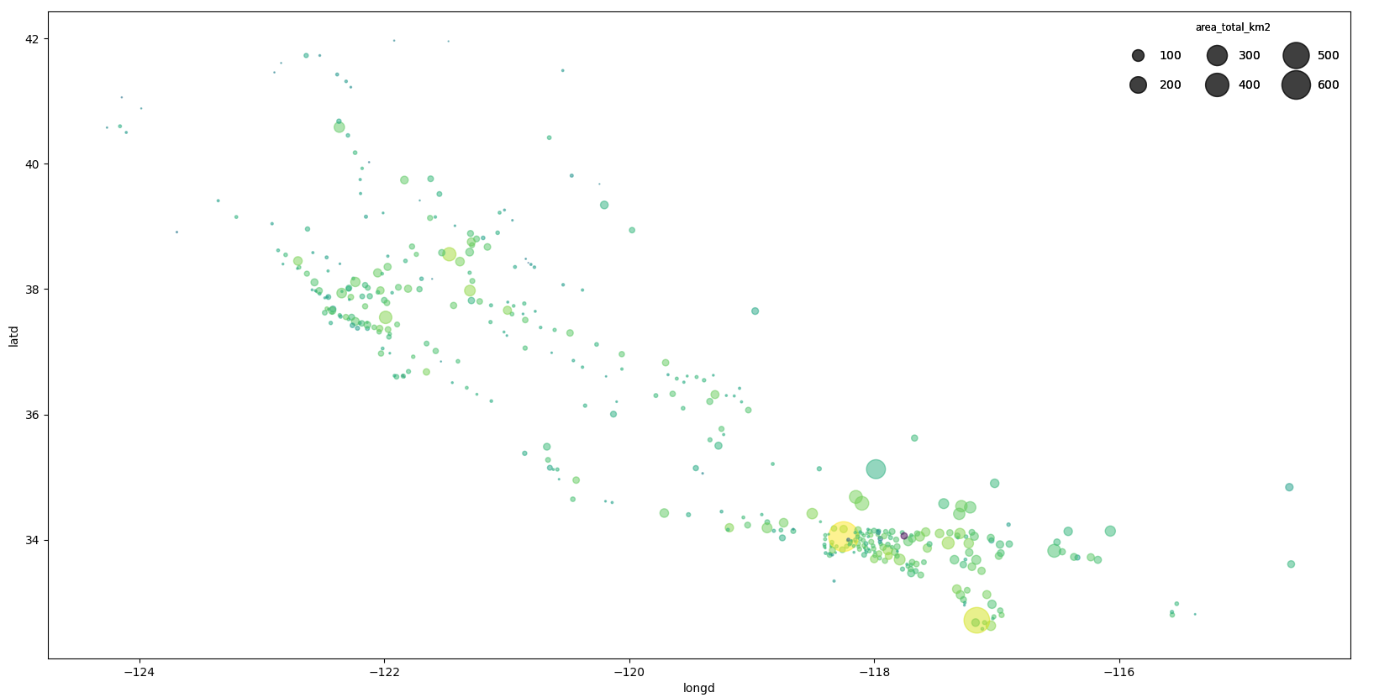

In [4]:
# Crear la columna log de población
df['log_poblacion'] = np.log10(df['population_total'])

TypeError: cannot convert the series to <class 'float'>

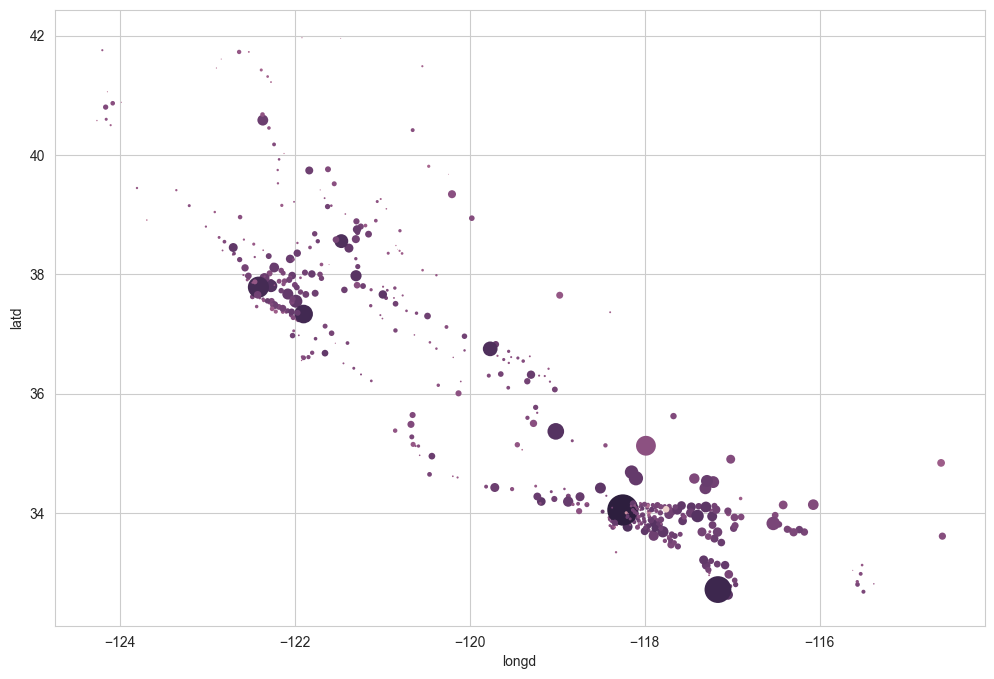

In [10]:
crear_scatter_avanzado(
    df=df,
    col_num1='longd',
    col_num2='latd',
    col_cat='log_poblacion',
    tamano='area_total_sq_mi',
    escala=1
)

## #2: Presentación

En esta parte tendrás que hacer dos cosas, crear una presentación sobre el titanic de no más de 6 slides, sin incluir portada, con los siguientes mensajes y su apoyo en datos:  
1- El titanic fue un accidente con una tasa de mortalidad alta.  
2- En esa ocasión los datos apoyan que se dio el "Las mujeres y los niños primero", pero...  
3- ... que la clase en la que se viajes tuvo una influencia significativa y podría explicar...  
4- ... las diferencias de tasas de supervivencia entre mujeres y niños.    
5- Además aunque el puerto de embarque parece influir, se podría asumir que lo fue el tipo de pasaje que embarcó en cada uno.  

Y generar el notebook con las gráficas que vas a emplear en la presentación. Tienes que entregar ambas cosas.

In [11]:
df_tit= pd.read_csv("./data/titanic.csv")
df_tit

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [20]:

def create_titanic_slides(df):
    """
    Función principal que genera las visualizaciones para cada diapositiva de la presentación
    del Titanic.
    """
    # Configuración general para todas las visualizaciones
    sns.set_style("whitegrid")
    sns.set_palette("husl")
    
    # Slide 1: Tasa de mortalidad
    plt.figure(figsize=(10, 6))
    survival_counts = df['survived'].value_counts()
    plt.pie(survival_counts, 
            labels=['No Sobrevivieron', 'Sobrevivieron'],
            colors=['#FF9999', '#66B2FF'],
            autopct='%1.1f%%',
            explode=(0.05, 0))
    plt.title('Tasa de Supervivencia en el Titanic', pad=20)
    plt.savefig('slide1.png', bbox_inches='tight', dpi=300)
    plt.close()

    # Slide 2: Mujeres y niños primero
    plt.figure(figsize=(12, 6))
    # Crear columna de grupo demográfico
    df['Demographic'] = 'Hombre adulto'
    df.loc[df['age'] < 16, 'Demographic'] = 'Niño/a'
    df.loc[df['sex'] == 'female', 'Demographic'] = 'Mujer'
    
    survival_by_demo = df_tit.groupby('Demographic')['survived'].mean().sort_values(ascending=False)
    ax = survival_by_demo.plot(kind='bar', color=['#FF69B4', '#87CEEB', '#4682B4'])
    plt.title('Tasas de Supervivencia por Grupo Demográfico', pad=20)
    plt.xlabel('Grupo Demográfico')
    plt.ylabel('Tasa de Supervivencia')
    
    # Añadir etiquetas de porcentaje
    for i, v in enumerate(survival_by_demo):
        plt.text(i, v + 0.01, f'{v:.1%}', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.savefig('slide2.png', bbox_inches='tight', dpi=300)
    plt.close()

    # Slide 3: Influencia de la clase
    plt.figure(figsize=(12, 6))
    survival_by_class = df.groupby('class')['survived'].mean().sort_values(ascending=False)
    ax = survival_by_class.plot(kind='bar', color=sns.color_palette("Blues_r"))
    plt.title('Tasas de Supervivencia por Clase', pad=20)
    plt.xlabel('Clase de Pasajero')
    plt.ylabel('Tasa de Supervivencia')
    
    # Añadir etiquetas de porcentaje
    for i, v in enumerate(survival_by_class):
        plt.text(i, v + 0.01, f'{v:.1%}', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.savefig('slide3.png', bbox_inches='tight', dpi=300)
    plt.close()

    # Slide 4: Supervivencia de mujeres por clase
    plt.figure(figsize=(12, 6))
    women_by_class = df[df['sex'] == 'female'].groupby('class')['survived'].mean().sort_values(ascending=False)
    children_by_class = df[df['age'] < 16].groupby('class')['survived'].mean()
    
    data = pd.DataFrame({
        'Mujeres': women_by_class,
        'Niños': children_by_class
    })
    
    ax = data.plot(kind='bar', width=0.8)
    plt.title('Tasas de Supervivencia de Mujeres y Niños por Clase', pad=20)
    plt.xlabel('Clase de Pasajero')
    plt.ylabel('Tasa de Supervivencia')
    
    # Añadir etiquetas de porcentaje
    for i in range(len(data.index)):
        for j, col in enumerate(data.columns):
            value = data.iloc[i, j]
            plt.text(i + (j-0.5)*0.4, value + 0.01, 
                    f'{value:.1%}', ha='center', va='bottom')
    
    plt.legend(title='Grupo')
    plt.tight_layout()
    plt.savefig('slide4.png', bbox_inches='tight', dpi=300)
    plt.close()

    # Slide 5: Distribución de clases por puerto
    plt.figure(figsize=(12, 6))
    port_class = pd.crosstab(df['embarked'], df['class'], normalize='index') * 100
    ax = port_class.plot(kind='bar', stacked=True)
    plt.title('Distribución de Clases por Puerto de Embarque', pad=20)
    plt.xlabel('Puerto de Embarque')
    plt.ylabel('Porcentaje de Pasajeros')
    plt.legend(title='Clase', labels=['Primera', 'Segunda', 'Tercera'])
    
    # Añadir etiquetas de porcentaje
    for c in ax.containers:
        ax.bar_label(c, fmt='%.1f%%')
    
    plt.tight_layout()
    plt.savefig('slide5.png', bbox_inches='tight', dpi=300)
    plt.close()

# Para usar el código:
# df = pd.read_csv('titanic.csv')
# create_titanic_slides(df)

In [21]:
create_titanic_slides(df_tit)

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>